<a href="https://colab.research.google.com/github/kancingkuning/happiness_and_alcohol/blob/main/Alcohol_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Does Alcohol Consumption Link with Happines? 

dataset: https://www.kaggle.com/datasets/marcospessotto/happiness-and-alcohol-*consumption*


In [6]:
from google.colab import files
uploaded = files.upload()

Saving HappinessAlcoholConsumption.csv to HappinessAlcoholConsumption.csv


In [7]:
import pandas as pd
df = pd.read_csv('/content/HappinessAlcoholConsumption.csv')
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [8]:
df.isnull().sum()

Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64

In [9]:
df.shape

(122, 9)

In [10]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df['total_alcohol_usage_percapita'] = df.Beer_PerCapita + df.Spirit_PerCapita + df.Wine_PerCapita
df

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493
...,...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1,43
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2,173
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13,51
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19,57


In [73]:
max_alcohol_usage = df['total_alcohol_usage_percapita'].max()
df[df['total_alcohol_usage_percapita'] == max_alcohol_usage]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
25,Czech Republic,Central and Eastern Europe,north,6.596,885,18.484,361,170,134,665


In [74]:
min_alcohol_usage = df['total_alcohol_usage_percapita'].min()
df[df['total_alcohol_usage_percapita'] == min_alcohol_usage]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
109,Comoros,Sub-Saharan Africa,south,3.956,502,775.0,1,3,1,5


In [30]:
print(df['Hemisphere'].unique())

['north' 'south' 'both' 'noth']


In [31]:
print(df.Hemisphere.value_counts())
df.Hemisphere = df.Hemisphere.str.replace('noth', 'north')

north    92
south    21
both      5
noth      4
Name: Hemisphere, dtype: int64


In [32]:
print(df.Hemisphere.value_counts())

north    96
south    21
both      5
Name: Hemisphere, dtype: int64


In [33]:
print(df.Region.value_counts())

Sub-Saharan Africa                 28
Central and Eastern Europe         27
Latin America and Caribbean        23
Western Europe                     20
Middle East and Northern Africa    11
Southeastern Asia                   5
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


In [57]:
#most happiest country 
most_happiest = df['HappinessScore'].max()
df[df['HappinessScore'] == most_happiest]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583


In [56]:
#least happiest country 
least_happiest = df['HappinessScore'].min()
df[df['HappinessScore'] == least_happiest]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
121,Syria,Middle East and Northern Africa,north,3.069,536,2.058,5,35,16,56


In [51]:
#most drunk beer country
most_drunk_beer = df['Beer_PerCapita'].max()
df[df['Beer_PerCapita'] == most_drunk_beer]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
90,Namibia,Sub-Saharan Africa,south,4.574,645,4.561,376,3,1,380


In [55]:
#most drunk spirit country
most_drunk_spirit = df['Spirit_PerCapita'].max()
df[df['Spirit_PerCapita'] == most_drunk_spirit]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
54,Belarus,Central and Eastern Europe,north,5.802,805,5.023,142,373,42,557


In [54]:
#most drunk wine country
most_drunk_wine = df['Wine_PerCapita'].max()
df[df['Wine_PerCapita'] == most_drunk_wine]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
30,France,Western Europe,north,6.478,899,36.87,127,151,370,648


Based on data happiness and alcohol consumption: 

Country with most amount of total alcohol consumption: Czech Republic

Country with least amount of alcohol consumption: Comoros

Most happiest country: Denmark 

Least happiest country: Syria 

Most drunk with beer: Namibia 

Most drunk with spirit: Belarus

Most drunk with wine: France

In [60]:
#highest country HDI 
most_hdi = df['HDI'].max()
df[df['HDI'] == most_hdi]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
3,Norway,Western Europe,north,7.498,951,70.89,169,71,129,369


In [61]:
#least country HDI 
least_hdi = df['HDI'].min()
df[df['HDI'] == least_hdi]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
113,Niger,Sub-Saharan Africa,north,3.856,351,368.0,3,2,1,6


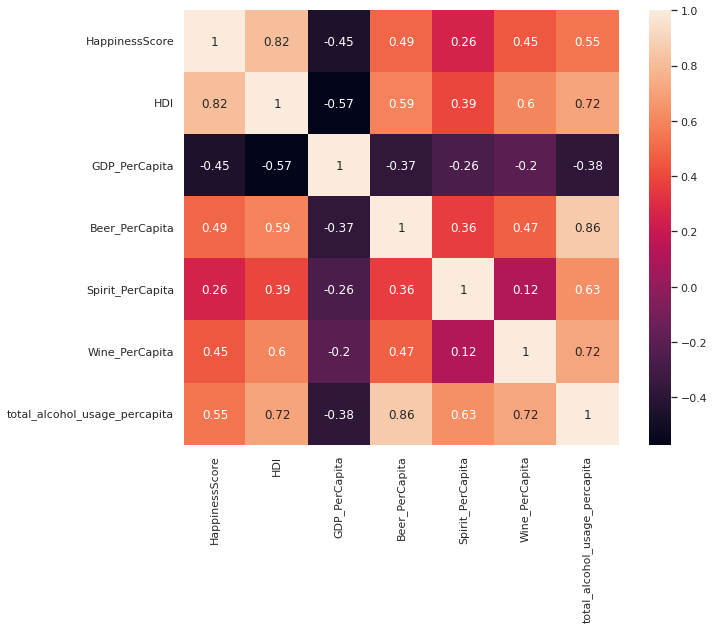

In [67]:
matrix_cor = df.corr()
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(matrix_cor, square=True, annot=True)

The correlation picture above shows that GDP per capita have negative correlation with other variables. 

The image also shows HDI and HappinessScore strongly corelated.

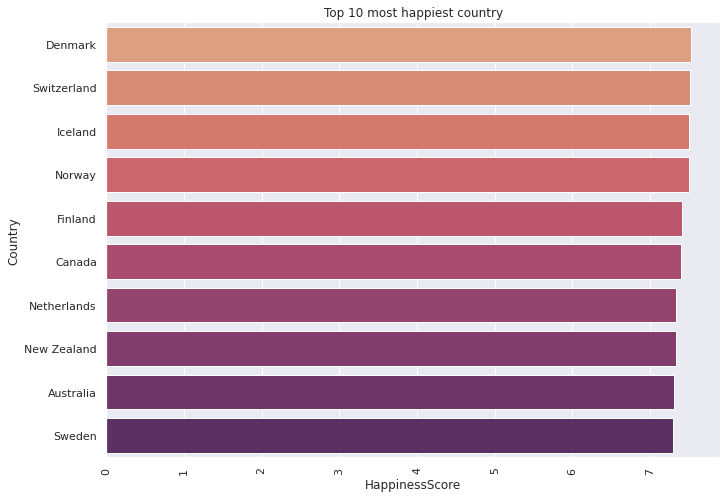

In [83]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x='HappinessScore', y='Country', data=df.nlargest(10, 'HappinessScore'), palette='flare')
plt.title('Top 10 most happiest country')
plt.xticks(rotation=90)
plt.show()

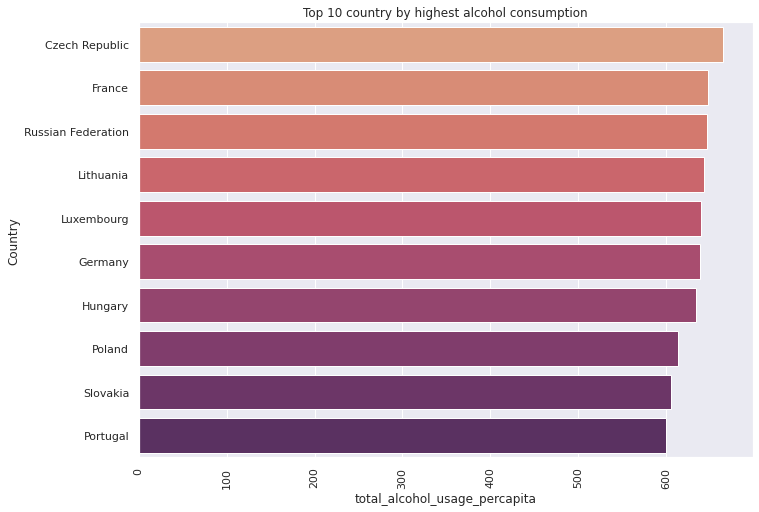

In [84]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x='total_alcohol_usage_percapita', y='Country', data=df.nlargest(10, 'total_alcohol_usage_percapita'), palette='flare')
plt.title('Top 10 country by highest alcohol consumption')
plt.xticks(rotation=90)
plt.show()

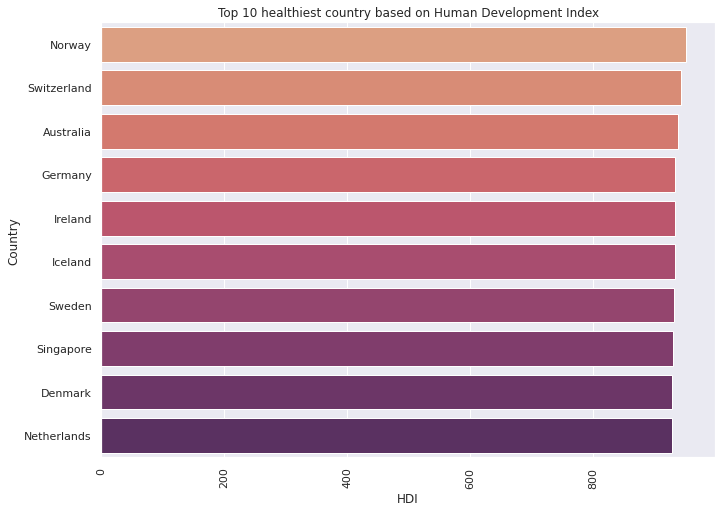

In [85]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x='HDI', y='Country', data=df.nlargest(10, 'HDI'), palette='flare')
plt.title('Top 10 healthiest country based on Human Development Index')
plt.xticks(rotation=90)
plt.show()

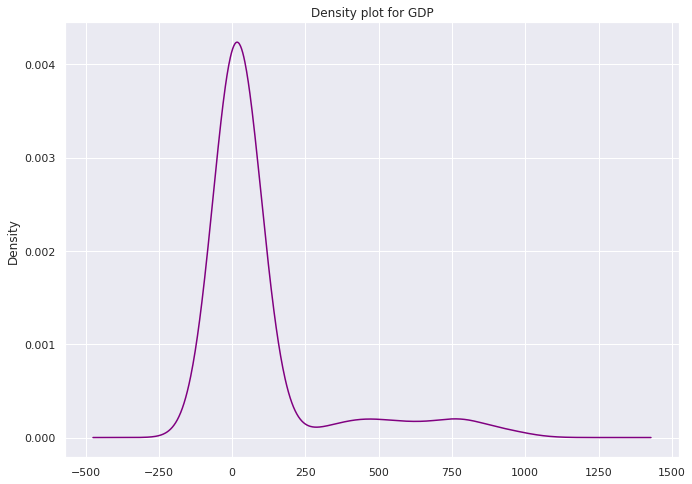

In [86]:
df.GDP_PerCapita.plot.density(color='purple')
plt.title('Density plot for GDP')
plt.show()

Text(0.5, 1.0, 'Density Plot of the Human Development Index')

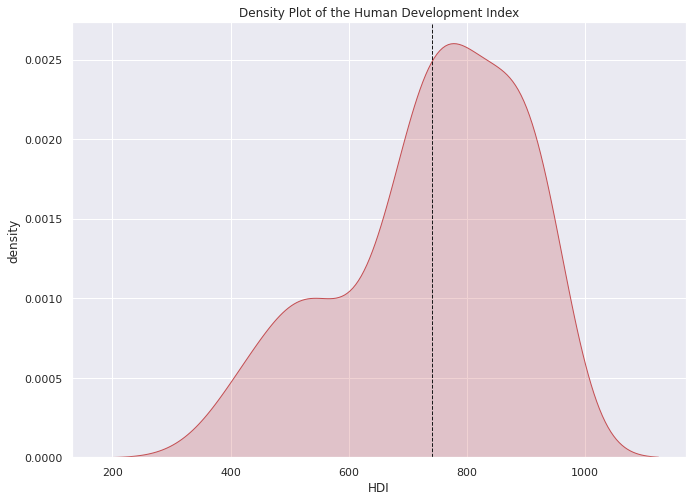

In [89]:
sns.kdeplot(df['HDI'], color='r', shade=True, Label='HDI') 
plt.axvline(df['HDI'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('HDI')
plt.ylabel('density')
plt.title('Density Plot of the Human Development Index')

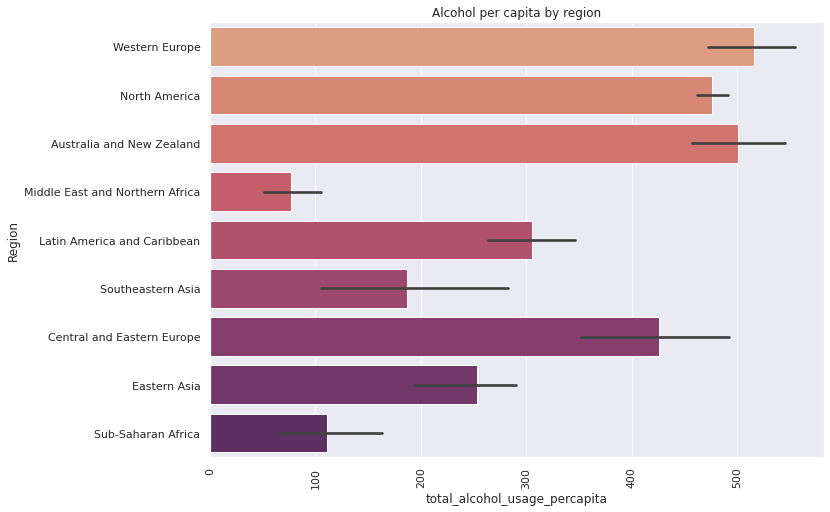

In [91]:
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(x='total_alcohol_usage_percapita', y='Region', data=df, palette='flare')
plt.title('Alcohol per capita by region')
plt.xticks(rotation=90)
plt.show()

#Model to measure happines by alcohol consumption

In [92]:
df.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,total_alcohol_usage_percapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,583
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,565
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,372
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,369
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,493


In [95]:
df2 = df.drop(df.columns[[0,1,2,9]], axis=1)
df2.head()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,7.526,928,53.579,224,81,278
1,7.509,943,79.866,185,100,280
2,7.501,933,60.530,233,61,78
3,7.498,951,70.890,169,71,129
4,7.413,918,43.433,263,133,97


In [97]:
df2.columns  

Index(['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita',
       'Spirit_PerCapita', 'Wine_PerCapita'],
      dtype='object')

In [106]:
from sklearn.preprocessing import StandardScaler
data = df2 
scaler = StandardScaler()
scaler.fit(data)
print(scaler.transform(data))

[[ 1.74924815e+00  1.25391695e+00 -1.81604300e-01  8.28019940e-01
  -1.92333501e-01  2.40887178e+00]
 [ 1.73438825e+00  1.35443244e+00 -5.56584134e-02  4.54409805e-01
   4.19434593e-02  2.43166131e+00]
 [ 1.72739536e+00  1.28742212e+00 -1.48300771e-01  9.14237664e-01
  -4.38940828e-01  1.29918989e-01]
 [ 1.72477302e+00  1.40804070e+00 -9.86640921e-02  3.01133852e-01
  -3.15637164e-01  7.11051951e-01]
 [ 1.65047352e+00  1.18690663e+00 -2.30215665e-01  1.20163008e+00
   4.48845548e-01  3.46419504e-01]
 [ 1.64260651e+00  1.21371076e+00 -2.35409310e-01  9.81295893e-01
   3.13211519e-01  3.80603796e-01]
 [ 1.58578925e+00  1.25391695e+00 -2.19651102e-01  1.08667311e+00
  -1.06020937e-01  1.40613255e+00]
 [ 1.58141869e+00  1.16680353e+00 -2.45073130e-01  6.26845252e-01
  -2.16994234e-01  1.23521109e+00]
 [ 1.56306234e+00  1.32092728e+00 -1.99245444e-01  1.18247058e+00
  -3.03306798e-01  1.65681736e+00]
 [ 1.54383188e+00  1.28072108e+00 -1.89912215e-01  1.38278152e-01
  -4.51271194e-01  1.3605

In [107]:
x = df[['HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']]
y = df['HappinessScore']

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)

In [109]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.6866851041524705

In [110]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
ada.score(x_test,y_test)

0.8029583732576182

In [111]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=42)
regr.fit(x_train,y_train)
regr.score(x_test,y_test)

0.6927203189630857